In [108]:
from IPython.core.display import HTML, display
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pc='20180810-1319-pointcloud-dataset-small.p'
vox = '20180810-1330-voxelgrid-dataset-small.p'

PCin = open(pc,'rb')
VOXin = open(vox, 'rb')

PC = pickle.load(PCin)
VOX = pickle.load(VOXin)

Xpc = PC[0]
Ypc = PC[1]

Xvox = VOX[0]
Yvox = VOX[1]

In [6]:
print('Voxel shape:', Xvox.shape,'Target shape:', Yvox.shape)
print('Point cloud shape:', Xpc.shape,'Target shape:', Ypc.shape)

Voxel shape: (10, 32, 32, 32) Target shape: (10, 2)
Point cloud shape: (10, 30000, 4) Target shape: (10, 2)


In [79]:
Xpc[1].shape

(30000, 4)

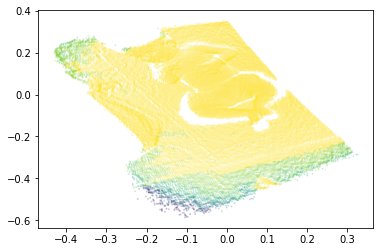

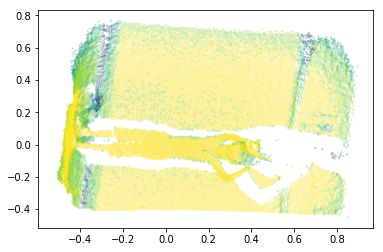

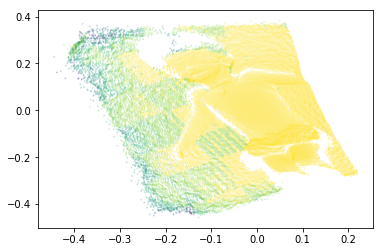

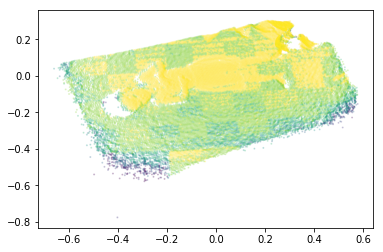

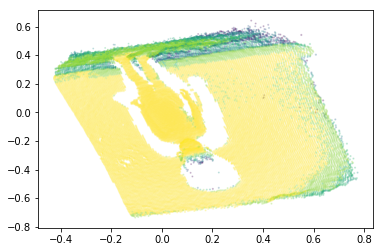

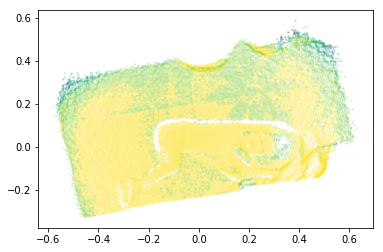

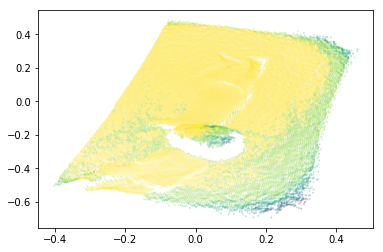

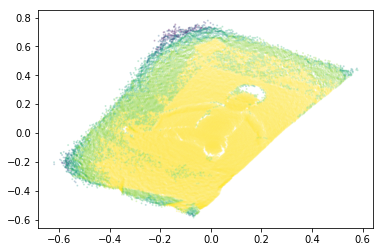

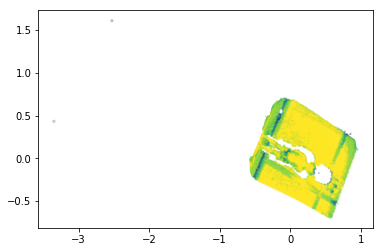

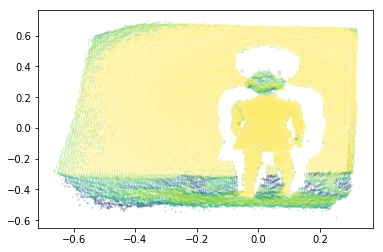

In [97]:
for i in range(Xpc.shape[0]):    # point cloud viewer
    plt.scatter(Xpc[i][:,1],Xpc[i][:,0],Xpc[i][:,2],Xpc[i][:,3],alpha = 0.2)
    plt.show()


from mpl_toolkits.mplot3d import Axes3D   # voxel viewer
for i in range(1):
    fig = plt.figure(figsize=(50,50))
    
    ax=fig.gca(projection = '3d')
    ax.voxels((Xvox[i]))

In [186]:
X=Xpc

In [187]:
X = X.reshape((-1,120000))
X.shape

(10, 120000)

In [188]:
import warnings
warnings.filterwarnings('ignore')
from keras import models, layers

embedding_dim = 120
input_img  = layers.Input(shape = (120000,))

# Encoder
encoded = layers.Dense(embedding_dim,activation='relu')(input_img)


# Decoder
decoded = layers.Dense(120000,activation='sigmoid')(encoded)


# Autoencoder
autoencoder = models.Model(input_img,decoded)
autoencoder.summary()



encoder = models.Model(input_img, encoded)
encoder.summary()

encoded_input = layers.Input(shape = (embedding_dim,))


decoder_layer = autoencoder.layers[-1]
decoder = models.Model(encoded_input,decoder_layer(encoded_input))
decoder.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 120000)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               14400120  
_________________________________________________________________
dense_10 (Dense)             (None, 120000)            14520000  
Total params: 28,920,120
Trainable params: 28,920,120
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 120000)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               14400120  
Total params: 14,400,120
Trainable params: 14,400,120
Non-traina

In [189]:
autoencoder.compile(
    optimizer = 'adadelta',
    loss = 'binary_crossentropy'
)



history = autoencoder.fit(
    X,X,
    epochs = 100,
    batch_size = 1,
    shuffle = True,
    validation_data = (X,X)

)

Train on 10 samples, validate on 10 samples
Epoch 1/100
10/10 [==============================] - 6s 614ms/step - loss: 0.6920 - val_loss: 0.6861
Epoch 2/100
10/10 [==============================] - 4s 440ms/step - loss: 0.6169 - val_loss: 0.3671
Epoch 3/100
10/10 [==============================] - 4s 444ms/step - loss: 0.1442 - val_loss: -0.0713
Epoch 4/100
10/10 [==============================] - 4s 438ms/step - loss: -0.0692 - val_loss: -0.2644
Epoch 5/100
10/10 [==============================] - 4s 437ms/step - loss: -0.2051 - val_loss: -0.3133
Epoch 6/100
10/10 [==============================] - 4s 439ms/step - loss: -0.2386 - val_loss: -0.3508
Epoch 7/100
10/10 [==============================] - 4s 435ms/step - loss: -0.2813 - val_loss: -0.3443
Epoch 8/100
10/10 [==============================] - 4s 437ms/step - loss: -0.2901 - val_loss: -0.3598
Epoch 9/100
10/10 [==============================] - 5s 468ms/step - loss: -0.2999 - val_loss: -0.3561
Epoch 10/100
10/10 [==============

10/10 [==============================] - 5s 475ms/step - loss: -0.7314 - val_loss: -0.7660
Epoch 80/100
10/10 [==============================] - 5s 502ms/step - loss: -0.7452 - val_loss: -0.7214
Epoch 81/100
10/10 [==============================] - 5s 461ms/step - loss: -0.7493 - val_loss: -0.7719
Epoch 82/100
10/10 [==============================] - 4s 449ms/step - loss: -0.7524 - val_loss: -0.7546
Epoch 83/100
10/10 [==============================] - 4s 441ms/step - loss: -0.7363 - val_loss: -0.7718
Epoch 84/100
10/10 [==============================] - 4s 445ms/step - loss: -0.7580 - val_loss: -0.7615
Epoch 85/100
10/10 [==============================] - 4s 441ms/step - loss: -0.7515 - val_loss: -0.7877
Epoch 86/100
10/10 [==============================] - 5s 473ms/step - loss: -0.7471 - val_loss: -0.7868
Epoch 87/100
10/10 [==============================] - 5s 477ms/step - loss: -0.7539 - val_loss: -0.7854
Epoch 88/100
10/10 [==============================] - 5s 460ms/step - loss: -

In [190]:
encoded_imgs = encoder.predict(X)   #latent space
decoded_imgs = decoder.predict(encoded_imgs)   #reconstruction


In [191]:
X = X.reshape((-1,30000,4))
decoded_imgs = decoded_imgs.reshape((-1,30000,4))
decoded_imgs.shape

(10, 30000, 4)

(10, 120)
(10, 30000, 4)


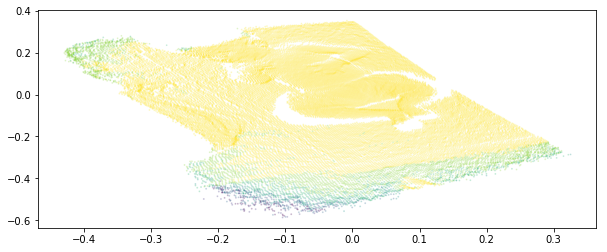

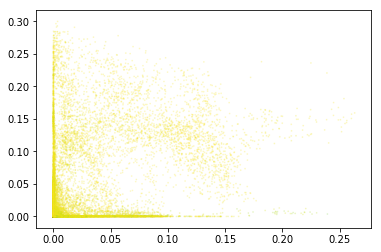

In [192]:
print(encoded_imgs.shape)
print(decoded_imgs.shape)

plt.figure(figsize = (10,4))

n=10

#plt.scatter(xtest[0][:,1],xtest[0][:,0],xtest[0][:,2],xtest[0][:,3],alpha = 0.2)

plt.scatter(X[0][:,1],X[0][:,0],X[0][:,2],X[0][:,3],alpha = 0.2)
plt.show()


plt.scatter(decoded_imgs[0][:,1],decoded_imgs[0][:,0],decoded_imgs[0][:,2],decoded_imgs[0][:,3],alpha = 0.2)




plt.show()